<a href="https://colab.research.google.com/github/HANISY/FastCampus-EXPORT-Data-Analysis/blob/main/Marketing_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Commerce / Marketing Data Analyst Preview Test - Basic**
```
현재는 2014년 3월, 가상의 온라인 커머스 기업의 데이터 분석가로 해당 서비스의 데이터 분석을 진행하려고 합니다.
```


## **Data Schema**

* 실습에 활용한 Retail Case Study Data는 소매 업체의 거래 내역, 고객 정보, 카테고리 정보를 담고 있습니다.
* 실습 데이터 출처 : Kaggle-Retail Case Study Data


In [ ]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# CSV 파일 읽어오기
df = pd.read_csv('/content/drive/MyDrive/merge_trans_cust_prod.csv')
df.head()

,cust_id,dob,age,gender,city_code,order_status,confirmed_yn,transaction_id,tran_date,prod_cat_code,prod_sub_cat_code,prod_cat,prod_subcat,qty,rate,tax,total_amt,store_type
0,272172,1975-09-17,36,M,10.0,Ordered,1.0,3268991,2011-08-02,6,11,Home and kitchen,Bath,3,91,28.665,301.665,e-Shop
1,269640,1970-04-29,41,M,7.0,Ordered,1.0,7073244,2013-05-11,5,12,Books,Academic,4,1385,581.700,6121.700,MBR
2,272671,1974-04-01,37,F,7.0,Ordered,1.0,10861359,2013-10-25,4,4,Bags,Women,2,103,21.630,227.630,Flagship store
3,271544,1986-05-08,25,F,5.0,Ordered,1.0,15741026,2011-03-28,5,12,Books,Academic,1,299,31.395,330.395,e-Shop
4,273203,1984-02-29,27,M,2.0,Ordered,1.0,16165359,2013-08-01,1,4,Clothing,Mens,2,580,121.800,1281.800,e-Shop


# **Data Preprocessing & Exploratory Data Analysis**

In [ ]:
# trand_date 컬럼을 datetime 타입으로 변환
df['tran_date'] = pd.to_datetime(df['tran_date'])

In [ ]:
# 컬럼 속성 및 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22933 entries, 0 to 22932
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cust_id            22933 non-null  int64         
 1   dob                22933 non-null  object        
 2   age                22933 non-null  int64         
 3   gender             22933 non-null  object        
 4   city_code          22933 non-null  float64       
 5   order_status       22933 non-null  object        
 6   confirmed_yn       22933 non-null  float64       
 7   transaction_id     22933 non-null  int64         
 8   tran_date          22933 non-null  datetime64[ns]
 9   prod_cat_code      22933 non-null  int64         
 10  prod_sub_cat_code  22933 non-null  int64         
 11  prod_cat           22933 non-null  object        
 12  prod_subcat        22933 non-null  object        
 13  qty                22933 non-null  int64         
 14  rate  

In [ ]:
# 각 컬럼의 통계치 확인
df.describe()

,cust_id,age,city_code,confirmed_yn,transaction_id,prod_cat_code,prod_sub_cat_code,qty,rate,tax,total_amt
count,22933.000000,22933.000000,22933.000000,22933.000000,2.293300e+04,22933.000000,22933.000000,22933.000000,22933.000000,22933.000000,22933.000000
mean,271022.206907,29.966729,5.479789,0.820608,5.006082e+10,3.763485,6.150089,2.460821,643.887062,248.627771,2132.443050
std,2431.412708,6.626191,2.863621,0.383689,2.898270e+10,1.676985,3.725407,2.237511,614.476851,187.095000,2485.093721
min,266783.000000,19.000000,1.000000,0.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268936.000000,24.000000,3.000000,1.000000,2.488360e+10,2.000000,3.000000,1.000000,318.000000,98.280000,777.920000
50%,270980.000000,30.000000,5.000000,1.000000,5.008910e+10,4.000000,5.000000,3.000000,715.000000,199.080000,1773.525000
75%,273115.000000,36.000000,8.000000,1.000000,7.531500e+10,5.000000,10.000000,4.000000,1111.000000,365.400000,3584.620000
max,275265.000000,41.000000,10.000000,1.000000,9.998755e+10,6.000000,12.000000,5.000000,1500.000000,787.500000,8287.500000


> 'cust_id', 'transaction_id', 'city_code', 'confirmed_yn', 'prod_cat_code', 'prod_sub_cat_code' 등은 숫자형이지만 문자형과 다름 없는 컬럼으로 위의 통계치는 큰 의미가 없으므로 각 항목의 빈도 등을 확인하는 방식의 분석이 필요하다.

## 1. 2011년 시점을 기준으로 5세 단위로 연령 구간을 나누고 각 성별, 연령 구간별로 고객 수 집계 </br> (단, 고객의 성별, 연령 정보를 구할 수 없을 경우 해당 데이터는 집계에서 제외)



### 1-0. Data Preprocessing(데이터 전처리)

In [ ]:
# CSV 파일 읽어오기
customer = pd.read_csv('/content/drive/MyDrive/data/Customer.csv')
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [ ]:
# 컬럼명을 소문자로 변경
customer.columns = customer.columns.str.lower()
customer.columns

Index(['customer_id', 'dob', 'gender', 'city_code'], dtype='object')

In [ ]:
# 날짜 포맷을 %d-%m-%Y 형식으로 지정하여 변환
customer["dob"] = pd.to_datetime(customer["dob"], format='%d-%m-%Y')
customer.head()

,customer_id,dob,gender,city_code
0,268408,1970-01-02,M,4.0
1,269696,1970-01-07,F,8.0
2,268159,1970-01-08,F,8.0
3,270181,1970-01-10,F,2.0
4,268073,1970-01-11,M,1.0


In [ ]:
# 고객 정보 데이터의 데이터 구조 확인
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  5647 non-null   int64         
 1   dob          5647 non-null   datetime64[ns]
 2   gender       5645 non-null   object        
 3   city_code    5645 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 176.6+ KB


In [ ]:
# 고객 정보 데이터의 'customer_id'컬럼과 거래 내역 데이터의 'cust_id'컬럼은 동일한 내용을 가짐
# customer_id를 cust_id로 변경
customer = customer.rename(columns = {'customer_id' : 'cust_id'})
customer.columns

Index(['cust_id', 'dob', 'gender', 'city_code'], dtype='object')

In [ ]:
# 고객 데이터 컬럼의 각 컬럼별 결측치 수 확인
customer.isnull().sum()

cust_id      0
dob          0
gender       2
city_code    2
dtype: int64

In [ ]:
# 결측치 데이터 확인
## gender 결측치
customer[customer["gender"].isnull()]

,cust_id,dob,gender,city_code
24,267199,1970-02-14,NaN,2.0
87,271626,1970-06-02,NaN,6.0


In [ ]:
# 고객의 성별, 연령 정보를 구할 수 없을 경우 해당 데이터는 집계에서 제외하므로 'gender'컬럼에서 결측치가 발생한 행을 제거
customer.dropna(subset=['gender'], inplace =True)

In [ ]:
# 'city_code'의 결측치는 데이터 중 가장 많은 값을 가지고 있는 코드로 임의 대체

# city_code 데이터 집계 (내림차순 정렬)
customer.groupby("city_code").count()["cust_id"].sort_values(ascending=False)

city_code
3.0     595
5.0     586
4.0     582
7.0     575
2.0     563
8.0     562
10.0    558
1.0     551
9.0     546
6.0     525
Name: cust_id, dtype: int64

In [ ]:
# 'city_code'컬럼의 결측치를 '3'으로 대체
customer["city_code"] = customer["city_code"].fillna(3)

# 결측치 재확인
customer.isnull().sum()

cust_id      0
dob          0
gender       0
city_code    0
dtype: int64

### 1-1. 성별 및 연령 구간 별로 고객 수 집계

In [ ]:
# age 파생 컬럼 생성을 위해 dob 데이터에서 연도만 추출 후 2011년 기준으로 나이를 추출
customer['birth_year'] = customer['dob'].dt.year
customer['age'] = 2011 - customer['birth_year']
customer.sort_values(by='age', ascending=False)

,cust_id,dob,gender,city_code,birth_year,age
0,268408,1970-01-02,M,4.0,1970,41
171,273170,1970-10-03,F,8.0,1970,41
145,274455,1970-09-08,F,10.0,1970,41
146,272088,1970-09-08,M,5.0,1970,41
147,273583,1970-09-08,M,5.0,1970,41
...,...,...,...,...,...,...
5477,269150,1992-04-22,F,9.0,1992,19
5478,269074,1992-04-23,F,9.0,1992,19
5479,269851,1992-04-25,F,10.0,1992,19
5480,269365,1992-04-26,M,8.0,1992,19


In [ ]:
# 연령대별로 구간을 나누기 위한 함수 정의
def age_group(age):
    if age < 20:
        return "15-19"
    elif age < 25:
        return "20-24"
    elif age < 30:
        return "25-29"
    elif age < 35:
        return "30-34"
    elif age < 40:
        return "35-39"
    else:
        return "40-44"

# 'age' 컬럼을 기준으로 연령대 구분하여 새로운 'age_group' 컬럼 추가
customer['age_group'] = customer['age'].apply(age_group)

# 연령대별 고객 수 계산
age_counts = customer['age_group'].value_counts().sort_index()
print("\nNumber of Customers by Age Range:")
print(age_counts)


Number of Customers by Age Range:
15-19     261
20-24    1251
25-29    1198
30-34    1240
35-39    1222
40-44     473
Name: age_group, dtype: int64


In [ ]:
# 성별에 따라 데이터 분리
male_df = customer[customer['gender'] == 'M']
female_df = customer[customer['gender'] == 'F']

# 각 성별에 대해 연령대별 고객 수 계산
male_age_counts = male_df['age_group'].value_counts().sort_index()
female_age_counts = female_df['age_group'].value_counts().sort_index()

# 남성과 여성의 연령대별 고객 수를 하나의 데이터프레임으로 합치기
gender_age_counts = pd.concat([male_age_counts, female_age_counts], axis=1)
gender_age_counts.columns = ['Male', 'Female']  # 컬럼명 설정

# 결과 출력
print("\nNumber of Customers by Age Range and Gender:")
print(gender_age_counts)


Number of Customers by Age Range and Gender:
       Male  Female
15-19   120     141
20-24   637     614
25-29   606     592
30-34   662     578
35-39   626     596
40-44   241     232


### 1-2. 연령/성별 통계 데이터 시각화


<ipython-input-20-f82d151566c6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f"{label.split('-')[0]}-{label.split('-')[1]}" for label in age_counts.index])


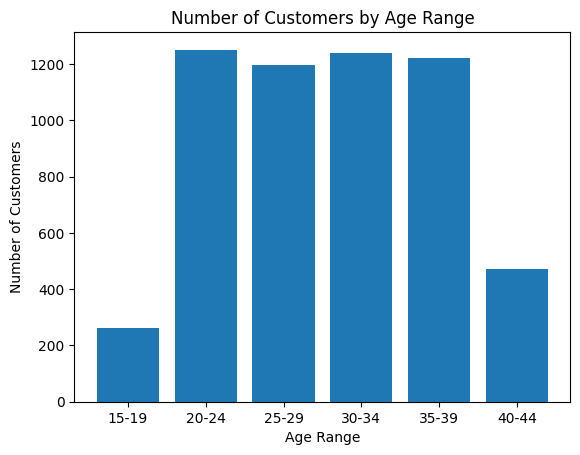

In [ ]:
# 그래프 그리기
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Range')

# x 축 라벨 수정
plt.gca().set_xticklabels([f"{label.split('-')[0]}-{label.split('-')[1]}" for label in age_counts.index])

plt.show()

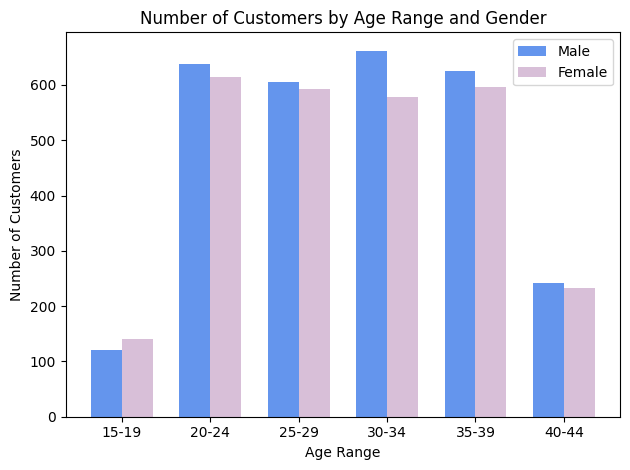

In [ ]:
# 그래프 그리기
bar_width = 0.35
index = np.arange(len(male_age_counts))

plt.bar(index, male_age_counts.values, bar_width, label='Male', color='cornflowerblue')
plt.bar(index + bar_width, female_age_counts.values, bar_width, label='Female', color='thistle')

plt.xlabel('Age Range')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Range and Gender')
plt.xticks(index + bar_width / 2, male_age_counts.index, rotation=0)  # x 축 라벨 회전
plt.legend()
plt.tight_layout()
plt.show()

## 2. 2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기 계산
* 구매 경과일수 = 기준일 - 마지막 구매일
* 구매주기 = (마지막 구매일 - 첫 구매일)/(총 구매 일수 - 1)


### 2-0. Data Preprocessing(데이터 전처리)

In [ ]:
# CSV 파일 읽어오기
transactions = pd.read_csv('/content/drive/MyDrive/data/Transactions.csv')
transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [ ]:
# 컬럼명을 소문자로 변경
transactions.columns = transactions.columns.str.lower()
transactions.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'qty', 'rate', 'tax', 'total_amt', 'store_type'],
      dtype='object')

In [ ]:
# '/'패턴을 '-'패턴으로 모두 변경하기 위해 '/'패턴 데이터 값 확인
slash = transactions['tran_date'].str.contains("/")
transactions.loc[slash]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
144,12323853707,273552,12/2/2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12/2/2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12/2/2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12/2/2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12/2/2014,10,6,4,933,391.860,4123.860,e-Shop
...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,1/2/2011,5,3,2,552,115.920,1219.920,TeleShop
22908,83849473598,269958,1/2/2011,12,5,3,403,126.945,1335.945,e-Shop
22909,95376486237,269403,1/2/2011,4,3,5,673,353.325,3718.325,MBR
22910,81365620177,274222,1/2/2011,3,2,3,373,117.495,1236.495,e-Shop


In [ ]:
# '/'패턴을 '-'패턴으로 모두 변경
transactions["tran_date"] = transactions["tran_date"].str.replace("/","-")
transactions.loc[slash]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
144,12323853707,273552,12-2-2014,12,6,4,510,214.200,2254.200,TeleShop
145,60596009595,274652,12-2-2014,12,5,4,183,76.860,808.860,MBR
146,17146707816,274897,12-2-2014,12,5,3,622,195.930,2061.930,MBR
147,36792372906,275246,12-2-2014,2,6,1,1185,124.425,1309.425,e-Shop
148,38821078489,267025,12-2-2014,10,6,4,933,391.860,4123.860,e-Shop
...,...,...,...,...,...,...,...,...,...,...
22907,80348907828,267124,1-2-2011,5,3,2,552,115.920,1219.920,TeleShop
22908,83849473598,269958,1-2-2011,12,5,3,403,126.945,1335.945,e-Shop
22909,95376486237,269403,1-2-2011,4,3,5,673,353.325,3718.325,MBR
22910,81365620177,274222,1-2-2011,3,2,3,373,117.495,1236.495,e-Shop


In [ ]:
# 날짜 포맷을 %d-%m-%Y 형식으로 지정하여 변환
transactions["tran_date"] = pd.to_datetime(transactions["tran_date"], format='%d-%m-%Y')      # 포맷을 지정하지 않을 경우 일자가 월로 인식이 되어 잘못된 변환 수행되므로 주의
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


#### 파생 컬럼 생성
파생 컬럼(derived columns) : 기본적으로 주어진 데이터의 각 정보를 바탕으로 계산 및 변형해서 추가로 설계한 정보


##### 거래 내역 데이터에서 주문된 거래와 취소된 거래를 구분하는 컬럼 생성


In [ ]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop


In [ ]:
# 거래 내역 샘플링
transactions[transactions['transaction_id'] == 80712190438].sort_values(by = 'tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type
26,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop


2월 20일에 주문된 거래가 28일에 취소되어 qty, rate, total_amt값이 음수값으로 나타났다.

In [ ]:
# 취소된 거래인지 정상 거래인지 구분할 수 있는 파생 컬럼 'order_status' 생성
# 'total_amt'값이 음수일 경우 Canceled, 양수일 경우 Ordered로 구분
transactions['order_status'] = transactions['total_amt'].apply(lambda x: 'Canceled' if x < 0 else 'Ordered') #간단한 함수를 정의
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled


In [ ]:
# 샘플링했던 거래 내역 재확인
transactions[transactions['transaction_id'] == 80712190438].sort_values(by = 'tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status
26,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Ordered
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Canceled


In [ ]:
# 'order_status'기준으로 데이터 집계
transactions.groupby('order_status').size()

order_status
Canceled     2177
Ordered     20876
dtype: int64

취소 없이 구매가 확정된 거래 건수는 18,699건이다.

##### 구매 확정 거래 건을 나타내는 컬럼 생성

In [ ]:
# 'order_status'값이 Canceled인 값을 필터링
# Canceled 데이터 중 transaction_id를 선택하고 새로운 컬럼 'confirmed_id'를 생성하여 해당 값에 0 입력
canceled_df = (
      transactions
      .loc[transactions['order_status'] == 'Canceled']
      .loc[:, ['transaction_id']]
      .assign(confirmed_yn=0)     # DataFrame에 새로운 열을 할당
      .drop_duplicates()      # 중복값 제거
)
canceled_df.head()

,transaction_id,confirmed_yn
0,80712190438,0
1,29258453508,0
2,51750724947,0
3,93274880719,0
5,97439039119,0


In [ ]:
# 'canceled_df'컬럼을 left join으로 데이터 결합
transactions = transactions.merge(canceled_df, on='transaction_id', how='left')
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled,0.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled,0.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled,0.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0


In [ ]:
# 거래 내역 샘플링
transactions[transactions['transaction_id'] == 80712190438].sort_values(by = 'tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
26,80712190438,270351,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Ordered,0.0
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Canceled,0.0


In [ ]:
# 'confirmed_yn' 컬럼의 NA 값을 1로 대체
transactions['confirmed_yn'] = transactions['confirmed_yn'].fillna(1)
transactions.head(20)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled,0.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled,0.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled,0.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Canceled,0.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Canceled,0.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Canceled,0.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Canceled,0.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Canceled,0.0


In [ ]:
# 'confirmed_yn' 컬럼을 기준으로 그룹화하고 행의 개수 계산
transactions.groupby('confirmed_yn').size()

confirmed_yn
0.0     4234
1.0    18819
dtype: int64

  앞서 계산한 취소 없이 구매가 확정된 거래 18,699건과 차이가 있음을 확인할 수 있다.

#### 이상치 데이터 전처리
데이터 전처리 이후에 이상치 데이터가 발생할 경우 원인을 파악하고 처리하는 과정 필요

##### 거래 구조를 위반하는 거래 건수 확인
하나의 'transaction_id'는 거래 확정(1개 레코드), 주문 후 취소(2개 레코드)의 두가지 거래 구조로 나타난다.
</br>
따라서, 2개 이상의 레코드값을 가지고 있는 데이터를 제외시켜야 한다.


In [ ]:
# 'transaction_id'가 2개 초과인 데이터 샘플링
summarized_df = transactions.groupby('transaction_id').size().reset_index(name = 'n')     #설정 인덱스를 제거하고 기본 인덱스(0,1,2, ... , n)으로 변경
summarized_df[summarized_df['n'] > 2].head()


,transaction_id,n
90,426787191,4
645,3130889793,3
846,4170892941,4
944,4545655117,3
1135,5479136053,3


In [ ]:
# 첫 행을 새로운 샘플 데이터프레임 객체로 생성
sample_df = transactions[transactions['transaction_id'] == 426787191].sort_values(by='tran_date')
sample_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
13168,426787191,273106,2012-05-18,1,2,5,109,57.225,602.225,e-Shop,Ordered,0.0
13156,426787191,273106,2012-05-19,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0
12961,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0
12967,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0


18일에 발생한 주문이 19일에 1번, 28일에 2번 취소되었음을 확인할 수 있다.

In [ ]:
# 최근 발생한 거래 데이터를 남겨두고 나머지 제외하기 위해 'transaction_id', 'order_status'컬럼을 기준으로 순번 지정
sample_df = sample_df.sort_values(by=['transaction_id', 'tran_date'], ascending=[True,False])
sample_df['row_num'] = sample_df.groupby(['transaction_id', 'order_status']).cumcount() + 1
sample_df

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
12961,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,1
12967,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,2
13156,426787191,273106,2012-05-19,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,3
13168,426787191,273106,2012-05-18,1,2,5,109,57.225,602.225,e-Shop,Ordered,0.0,1


In [ ]:
# 순번이 1인 것만 유지
sample_df[sample_df['row_num'] == 1]

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
12961,426787191,273106,2012-05-28,1,2,-5,-109,57.225,-602.225,e-Shop,Canceled,0.0,1
13168,426787191,273106,2012-05-18,1,2,5,109,57.225,602.225,e-Shop,Ordered,0.0,1


In [ ]:
# 전체 데이터에 적용 전 'transaction_id', 'tran_date'순으로 정렬
# 전처리 과정에서 발생하는 오류를 방지하기 위해 transactions2를 새로이 생성하는 것을 권장
transactions2 = transactions.sort_values(by=['transaction_id', 'tran_date'], ascending=[True,False])
transactions2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
19224,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0
5884,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0
4239,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0


In [ ]:
# 순번 매기기
transactions2['row_num'] = transactions2.groupby(['transaction_id', 'order_status']).cumcount() + 1
transactions2.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
19224,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0,1
5884,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0,1
2430,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0,1
21760,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0,1
4239,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0,1


In [ ]:
# 순번이 1인 것만 유지
transactions2 = transactions2[transactions2['row_num'] == 1]
transactions2.groupby('row_num').size()

row_num
1    22935
dtype: int64

앞서 2가지 방식으로 확인한 구매 확정 거래 건수에 차이가 있다면, 이상치 데이터가 여전히 존재한다는 것을 의미한다.

In [ ]:
# 전체 주문 건수에서 취소 건수를 제외한 거래 건수 확인
order_minus_cancel = transactions2.groupby('order_status').size()
order_minus_cancel
order_minus_cancel['Ordered'] - order_minus_cancel['Canceled']

18817

In [ ]:
# 'confirmed_yn'컬럼 기준으로 데이터 집계
confirmed_yn_result = transactions2.groupby('confirmed_yn').size()
confirmed_yn_result

confirmed_yn
0.0     4116
1.0    18819
dtype: int64

##### 주문은 없고, 취소만 발생한 거래 건수 확인

In [ ]:
# 'transaction_id' 단위로 각 주문 상태별 레코드 집계
od_ca_result = transactions2.groupby('transaction_id').agg(
    od_n=pd.NamedAgg(column='order_status', aggfunc=lambda x: (x == 'Ordered').sum()),
    ca_n=pd.NamedAgg(column='order_status', aggfunc=lambda x: (x == 'Canceled').sum())
).reset_index()
od_ca_result.head()

,transaction_id,od_n,ca_n
0,3268991,1,0
1,7073244,1,0
2,10861359,1,0
3,15741026,1,0
4,16165359,1,0


In [ ]:
# 'od_n'이 0인 행만 필터링(주문은 없고 취소만 있는 경우)하여 omit_df 객체로 할당
omit_df = od_ca_result[od_ca_result['od_n'] == 0]
omit_df

,transaction_id,od_n,ca_n
1851,8868056339,0,1
20329,97439039119,0,1


In [ ]:
# 이상치 제외하기
transactions3 = transactions2[~transactions2['transaction_id'].isin(omit_df['transaction_id'])]
transactions3 = transactions3.reset_index(drop=True)
transactions3.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn,row_num
0,3268991,272172,2011-08-02,11,6,3,91,28.665,301.665,e-Shop,Ordered,1.0,1
1,7073244,269640,2013-05-11,12,5,4,1385,581.700,6121.700,MBR,Ordered,1.0,1
2,10861359,272671,2013-10-25,4,4,2,103,21.630,227.630,Flagship store,Ordered,1.0,1
3,15741026,271544,2011-03-28,12,5,1,299,31.395,330.395,e-Shop,Ordered,1.0,1
4,16165359,273203,2013-08-01,4,1,2,580,121.800,1281.800,e-Shop,Ordered,1.0,1


In [ ]:
# 최종 검증
order_minus_cancel = transactions3.groupby('order_status').size()
order_minus_cancel
order_minus_cancel['Ordered'] - order_minus_cancel['Canceled']

18819

### 2-1. 2013년 2월 28일을 기준으로 각 고객의 구매 경과일수 및 구매주기 계산

In [ ]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,qty,rate,tax,total_amt,store_type,order_status,confirmed_yn
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Canceled,0.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Canceled,0.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Canceled,0.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Canceled,0.0


In [ ]:
# 2013년 2월 28일을 기준으로 지정
target_date = pd.Timestamp('2013-02-28')

# 2013년 2월 28일 이전의 거래 내역 추출
transactions_before_20130228 = transactions[transactions['tran_date'] <= target_date].reset_index(drop=True)

# 각 고객의 마지막 거래일과 최근 거래일 추출
last_tran_date = transactions_before_20130228.groupby('cust_id')['tran_date'].max().reset_index()
first_tran_date = transactions_before_20130228.groupby('cust_id')['tran_date'].min().reset_index()

# 총 구매 일수 구하기
tran_count = transactions_before_20130228.groupby('cust_id')['tran_date'].count().reset_index()
tran_total = tran_count['tran_date'] - 1

# 구매주기 계산
tran_cycle = ((last_tran_date['tran_date'] - first_tran_date['tran_date']) / tran_total).dt.days

# 거래 경과일수 계산
elapsed_days = (target_date - last_tran_date['tran_date']).dt.days

# 새로운 데이터프레임 생성
tran_data = pd.DataFrame({
    'cust_id': last_tran_date['cust_id'],
    'last_tran_date': last_tran_date['tran_date'],
    'first_tran_date': first_tran_date['tran_date'],
    'elapsed_days': elapsed_days,
    'tran_total': tran_total,
    'tran_cycle': tran_cycle.values
})

# 결과 출력
tran_data

,cust_id,last_tran_date,first_tran_date,elapsed_days,tran_total,tran_cycle
0,266783,2013-02-20,2011-09-23,8,4,129.0
1,266784,2012-12-04,2012-08-23,86,2,51.0
2,266785,2013-02-13,2011-03-15,15,6,116.0
3,266788,2013-02-12,2011-06-12,16,3,203.0
4,266794,2012-11-27,2011-03-18,93,8,77.0
...,...,...,...,...,...,...
5184,275257,2013-02-26,2011-12-05,2,2,224.0
5185,275261,2011-10-05,2011-09-26,512,1,9.0
5186,275262,2012-02-29,2011-08-13,365,1,200.0
5187,275264,2011-10-08,2011-08-05,509,1,64.0


### 2-2. 고객의 연령, 연령 구간, 성별 정보를 결합하여 특정 연령 구간, 성별 간 차이 확인


In [ ]:
# 성별 연령 데이터 병합
tran_data_info = pd.merge(tran_data, customer[['cust_id', 'gender', 'age', 'age_group']],
                              left_on='cust_id', right_on='cust_id', how='left')

tran_data_info

,cust_id,last_tran_date,first_tran_date,elapsed_days,tran_total,tran_cycle,gender,age,age_group
0,266783,2013-02-20,2011-09-23,8,4,129.0,M,37.0,35-39
1,266784,2012-12-04,2012-08-23,86,2,51.0,F,20.0,20-24
2,266785,2013-02-13,2011-03-15,15,6,116.0,F,26.0,25-29
3,266788,2013-02-12,2011-06-12,16,3,203.0,F,39.0,35-39
4,266794,2012-11-27,2011-03-18,93,8,77.0,F,40.0,40-44
...,...,...,...,...,...,...,...,...,...
5184,275257,2013-02-26,2011-12-05,2,2,224.0,M,24.0,20-24
5185,275261,2011-10-05,2011-09-26,512,1,9.0,F,38.0,35-39
5186,275262,2012-02-29,2011-08-13,365,1,200.0,M,38.0,35-39
5187,275264,2011-10-08,2011-08-05,509,1,64.0,M,20.0,20-24


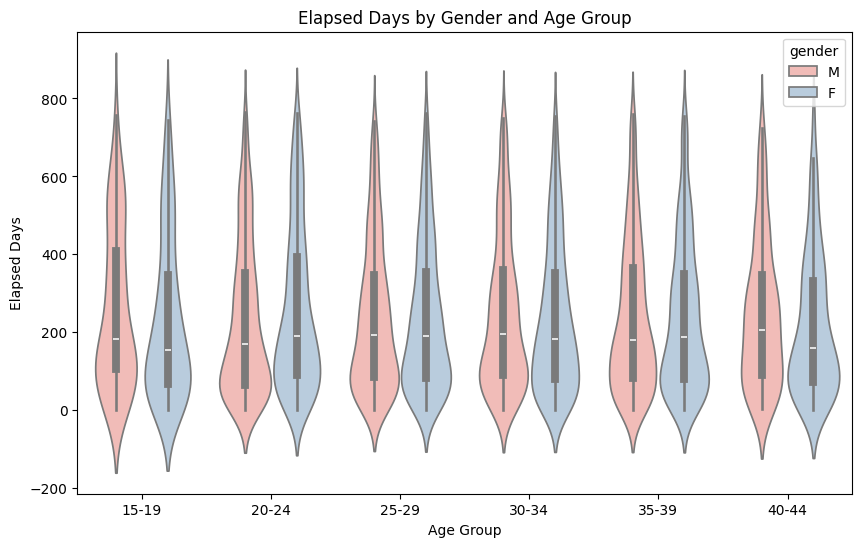

In [ ]:
# 성별 및 연령대별 구매 경과 일수 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='elapsed_days', hue="gender", data=tran_data_info, palette="Pastel1", order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44'])
plt.title('Elapsed Days by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Elapsed Days')
plt.show()

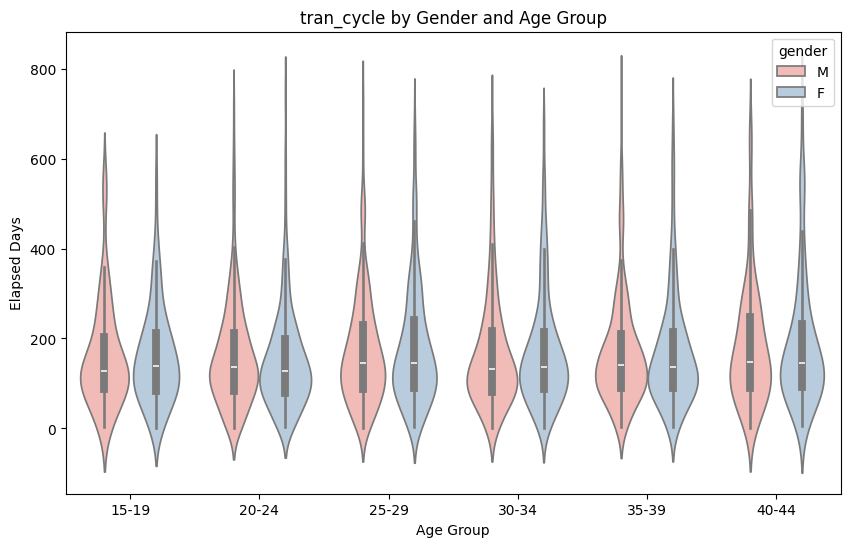

In [ ]:
# 성별 및 연령대별 구매 주기 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='age_group', y='tran_cycle', hue="gender", data=tran_data_info, palette="Pastel1", order=['15-19', '20-24', '25-29', '30-34', '35-39', '40-44'])
plt.title('tran_cycle by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Elapsed Days')
plt.show()

```
구매경과일수와 구매주기는 성별이나 연령대에 큰 영향을 받지 않는 것으로 판단된다.
```

### 2-3. 고객별 구매 경과일수를 기준으로 구매 경과일수가 30일 이상인 고객을 대상으로 재구매 유도를 위한 캠페인을 진행하였다고 가정하여, 2013년 12월 31일까지 구매한 고객 수 계산


In [ ]:
# 구매 경과 일수가 30일 이상인 고객 추출
elapsed_days_over30 = tran_data_info.loc[tran_data_info['elapsed_days'] >= 30]

# 고객 수 계산
print(f"구매 경과 일수가 30일 이상인 고객은 {elapsed_days_over30['cust_id'].nunique()}명이다")


구매 경과 일수가 30일 이상인 고객은 4675명이다


In [ ]:
# 2013년 12월 31일까지 구매 데이터 추출
tran_131231 = transactions[(transactions['tran_date'] >= target_date) & (transactions['tran_date'] <= pd.to_datetime('2013-12-31'))]
tran_campaign = pd.merge(elapsed_days_over30, tran_131231, how = 'inner', on = 'cust_id')

# 고객 수 계산
print(f"구매 경과 일수가 30일 이상인 고객 중 캠페인 기간 중 재구매한 고객은 {tran_campaign['cust_id'].nunique()}명이다")

구매 경과 일수가 30일 이상인 고객 중 캠페인 기간 중 재구매한 고객은 2977명이다


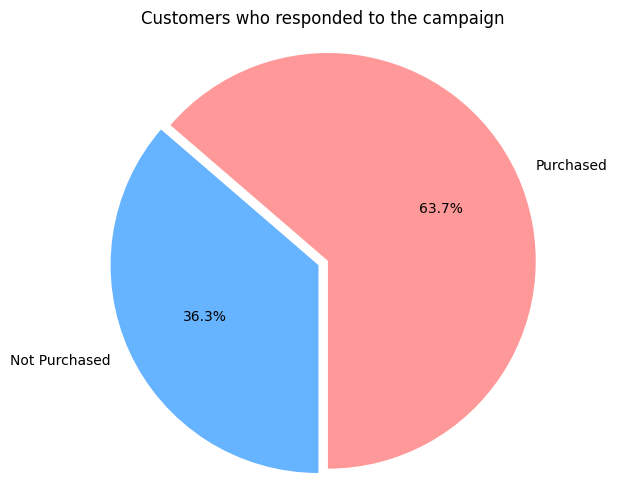

In [ ]:
total_customers = elapsed_days_over30['cust_id'].nunique()
purchased_customers = tran_campaign['cust_id'].nunique()

# 파이 차트 그리기
labels = ['Purchased', 'Not Purchased']
sizes = [purchased_customers, total_customers - purchased_customers]
colors = ['#ff9999', '#66b3ff']
exp = [0, 0.05]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270, explode=exp)
plt.title('Customers who responded to the campaign')
plt.axis('equal')
plt.show()

```
캠페인을 통한 구매 성공률은 약 64%로 우수한 성과를 나타냈다.
```

## 3. 전체 데이터에서 고객의 요일별 구매 건수 차이가 있는지 확인


요일별 구매 건수:
tran_date
0    2637
1    2611
2    2704
3    2701
4    2750
5    2687
6    2729
Name: confirmed_yn, dtype: int64


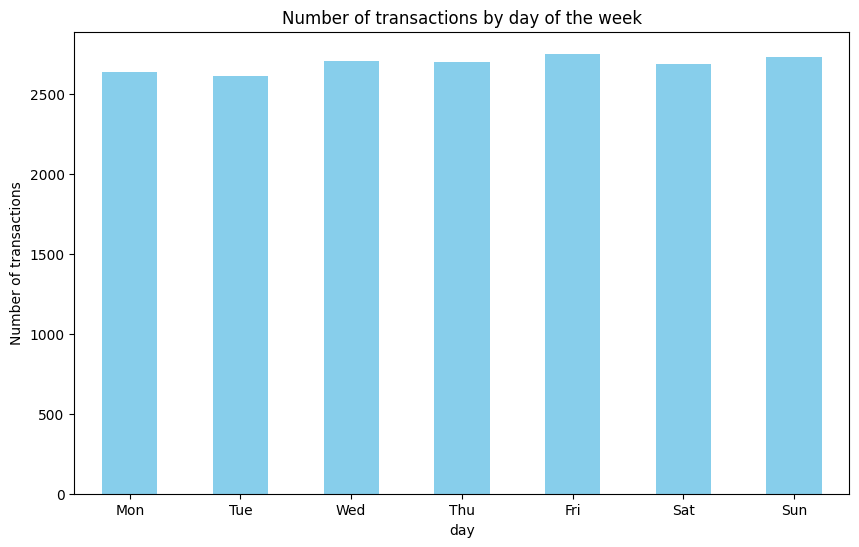

In [ ]:
# 요일별 구매 건수 계산
tran_by_day = df[df['confirmed_yn'] == 1].groupby(df['tran_date'].dt.dayofweek)['confirmed_yn'].count()

# 요일별 구매 건수 출력
print("요일별 구매 건수:")
print(tran_by_day)

# 요일별 구매 건수 그래프 그리기
plt.figure(figsize=(10, 6))
tran_by_day.plot(kind='bar', color='skyblue')

# 그래프에 제목과 축 레이블 추가
plt.title('Number of transactions by day of the week')
plt.xlabel('day')
plt.ylabel('Number of transactions')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)

# 그래프 출력
plt.show()

```
요일별 구매건수는 큰 차이가 나타나지 않는다.
```

## 4. 대 카테고리를 기준으로 2011년부터 2013년 월평균 매출액이 가장 높은 카테고리 확인


In [ ]:
# 2011년부터 2013년까지의 데이터 필터링
filtered_df = df[(df['tran_date'].dt.year >= 2011) & (df['tran_date'].dt.year <= 2013)]

# 월별로 그룹화하여 매출액의 평균 계산
monthly_sales = filtered_df.groupby([filtered_df['tran_date'].dt.year, filtered_df['tran_date'].dt.month])['total_amt'].mean()

# 2011년부터 2013년까지의 월평균 매출액이 가장 높은 prod_cat_code 찾기
max_sales_month = monthly_sales.idxmax()  # 최대값을 가지는 인덱스 (년, 월)
max_sales_cat_code = filtered_df[(filtered_df['tran_date'].dt.year == max_sales_month[0]) & (filtered_df['tran_date'].dt.month == max_sales_month[1])].groupby('prod_cat')['total_amt'].sum().idxmax()

print("2011년부터 2013년까지 월평균 매출액이 가장 높은 카테고리:", max_sales_cat_code)


2011년부터 2013년까지 월평균 매출액이 가장 높은 카테고리: Books


In [ ]:
# 상위 5개 월평균 매출액의 prod_cat_code 출력
top5_sales = monthly_sales.nlargest(5)
print("카테고리별 월평균 매출액 Top 5:")
for index, value in top5_sales.items():
    year, month = index
    prod_cat_code = filtered_df[(filtered_df['tran_date'].dt.year == year) & (filtered_df['tran_date'].dt.month == month)].groupby('prod_cat')['total_amt'].sum().idxmax()
    print(f"{year}년 {month}월: {prod_cat_code} (월평균 매출액: {value})")

카테고리별 월평균 매출액 Top 5:
2011년 1월: Books (월평균 매출액: 2392.2544680851065)
2012년 6월: Books (월평균 매출액: 2330.9446010638294)
2012년 3월: Books (월평균 매출액: 2308.2868421052635)
2011년 11월: Books (월평균 매출액: 2303.342776898734)
2013년 1월: Electronics (월평균 매출액: 2274.004580592105)


## 5. 각 카테고리별 월평균 매출액의 분산과 표준 편차 계산


In [ ]:
# 월별로 그룹화하여 매출액의 평균 계산
monthly_sales = df.groupby([df['tran_date'].dt.year, df['tran_date'].dt.month, 'prod_cat'])['total_amt'].mean()

# 카테고리별 월 평균 매출액의 분산과 표준 편차 계산
variance = monthly_sales.groupby('prod_cat').var().sort_values(ascending=False)
std_deviation = monthly_sales.groupby('prod_cat').std().sort_values(ascending=False)

print("각 카테고리별 월 평균 매출액의 분산:")
print(variance)

print("\n각 카테고리별 월 평균 매출액의 표준 편차:")
print(std_deviation)

각 카테고리별 월 평균 매출액의 분산:
prod_cat
Bags                95423.735622
Clothing            75598.176460
Home and kitchen    61621.651716
Footwear            53209.165157
Books               44496.663527
Electronics         31892.249254
Name: total_amt, dtype: float64

각 카테고리별 월 평균 매출액의 표준 편차:
prod_cat
Bags                308.907325
Clothing            274.951226
Home and kitchen    248.237088
Footwear            230.671119
Books               210.942323
Electronics         178.584012
Name: total_amt, dtype: float64


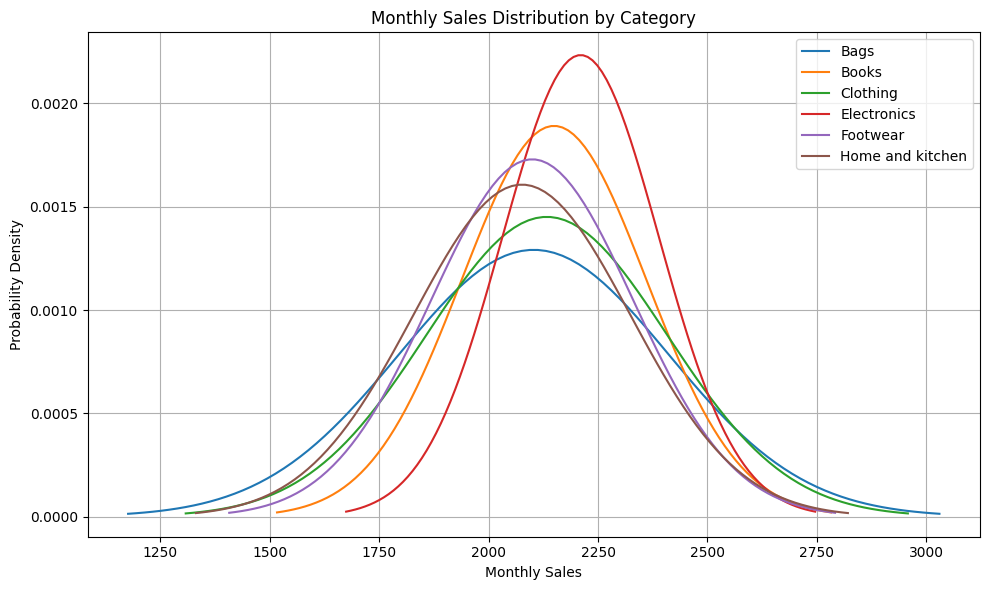

In [ ]:
from scipy.stats import norm

# 각 카테고리별 정규분포 그래프 그리기
categories = monthly_sales.index.get_level_values('prod_cat').unique()

plt.figure(figsize=(10, 6))

for category in categories:
    category_sales = monthly_sales[monthly_sales.index.get_level_values('prod_cat') == category]
    mean, std_dev = category_sales.mean(), category_sales.std()
    x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 100)
    y = norm.pdf(x, mean, std_dev)
    plt.plot(x, y, label=f'{category.capitalize()}')

plt.title('Monthly Sales Distribution by Category')
plt.xlabel('Monthly Sales')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

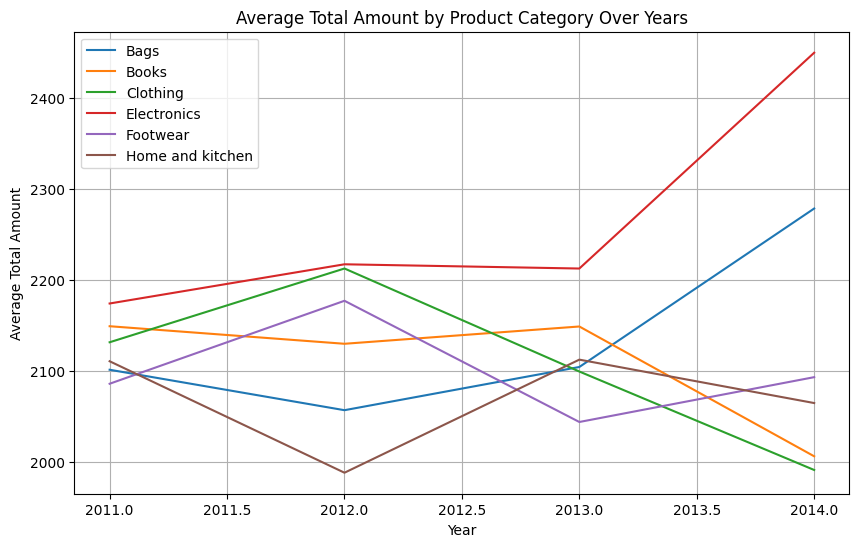

In [ ]:
# 연도(year) 및 월(month) 컬럼 추가
df['year'] = df['tran_date'].dt.year
df['month'] = df['tran_date'].dt.month

# prod_cat 별로 total_amt의 연 평균 계산
avg_total_amt_by_prod_cat = df.groupby(['prod_cat', 'year'])['total_amt'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 prod_cat 별로 그래프를 그립니다.
for prod_cat in avg_total_amt_by_prod_cat['prod_cat'].unique():
    data = avg_total_amt_by_prod_cat[avg_total_amt_by_prod_cat['prod_cat'] == prod_cat]
    plt.plot(data['year'], data['total_amt'], label=prod_cat)

plt.title('Average Total Amount by Product Category Over Years')
plt.xlabel('Year')
plt.ylabel('Average Total Amount')
plt.legend()
plt.grid(True)
plt.show()

#### 5-1. 각 카테고리에 대한 월평균 매출액과 표준 편차를 통해 현재 해당 서비스에서의 각 카테고리별 매출 성과를 판단
* 표준편차가 클수록 수익률이 큰 폭으로 움직였다는 것이므로 위험이 크다고 볼 수 있으며, 값이 작을수록 상대적으로 수익률의 변동폭이 작았기 때문에 위험도 낮다고 볼 수 있다.
* 성과를 평가할 때 월평균매출액의 표준편차 외에도 총 매출액과 매출액의 연간 또는 월간 증가율을 확인하여 전반적인 매출 동향을 추가로 파악하는 것이 도움이 된다.
* **결론적으로 월 평균 매출액의 표준편차가 가장 낮고, 연 평균 매출액 그래프에서 상승세를 보이는 'Electronics' 부문의 성과가 우수한 것으로 판단된다.**

# Interpretation & Hypothesising


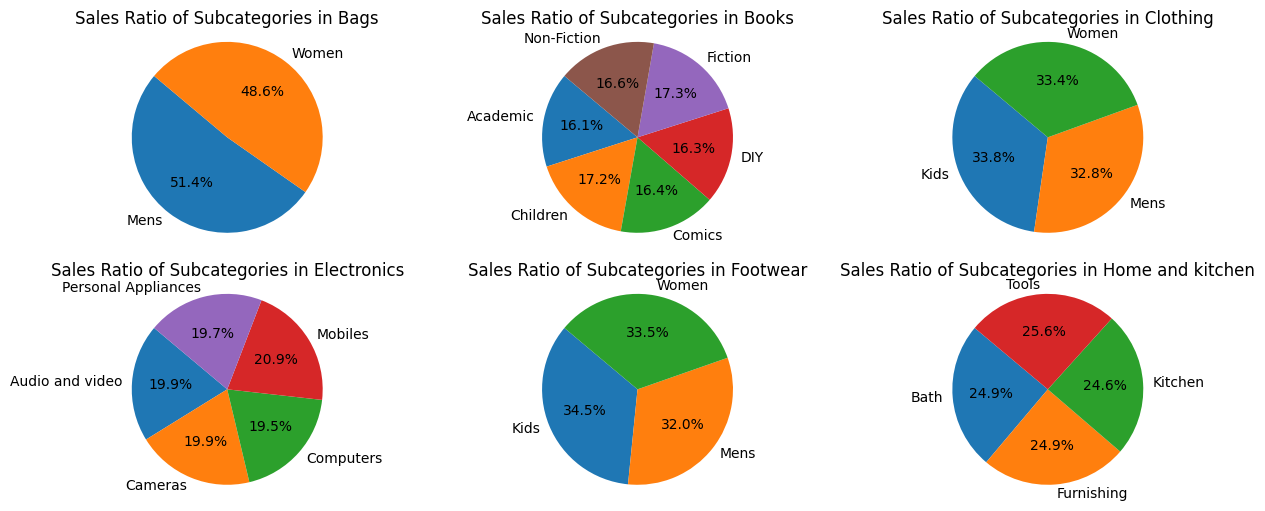

In [ ]:
# 대 카테고리별 총매출액 계산
total_sales = df.groupby('prod_cat')['total_amt'].sum()

# 각 대카테고리에 속하는 서브 카테고리의 매출 합산
total_sales_sub = df.groupby(['prod_cat', 'prod_subcat'])['total_amt'].sum()

# 각 서브카테고리의 매출을 해당 대카테고리의 총매출액으로 나누어 비율 계산
sales_ratio = total_sales_sub / total_sales

# 파이차트 그리기
def plot_pie_chart(ax, df, category):
    # 대카테고리별 서브카테고리 매출 비율 추출
    sales_ratio = df.loc[category]

    # 파이차트 그리기
    ax.pie(sales_ratio.values, labels=sales_ratio.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  # 원 모양 유지
    ax.set_title(f'Sales Ratio of Subcategories in {category}')

# 대카테고리 리스트 추출
categories = total_sales_sub.index.get_level_values(0).unique()

# 2x3 서브플롯 생성
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# 대카테고리별로 파이차트 그리기
for i, category in enumerate(categories):
    plot_pie_chart(axs[i//3, i%3], total_sales_sub, category)

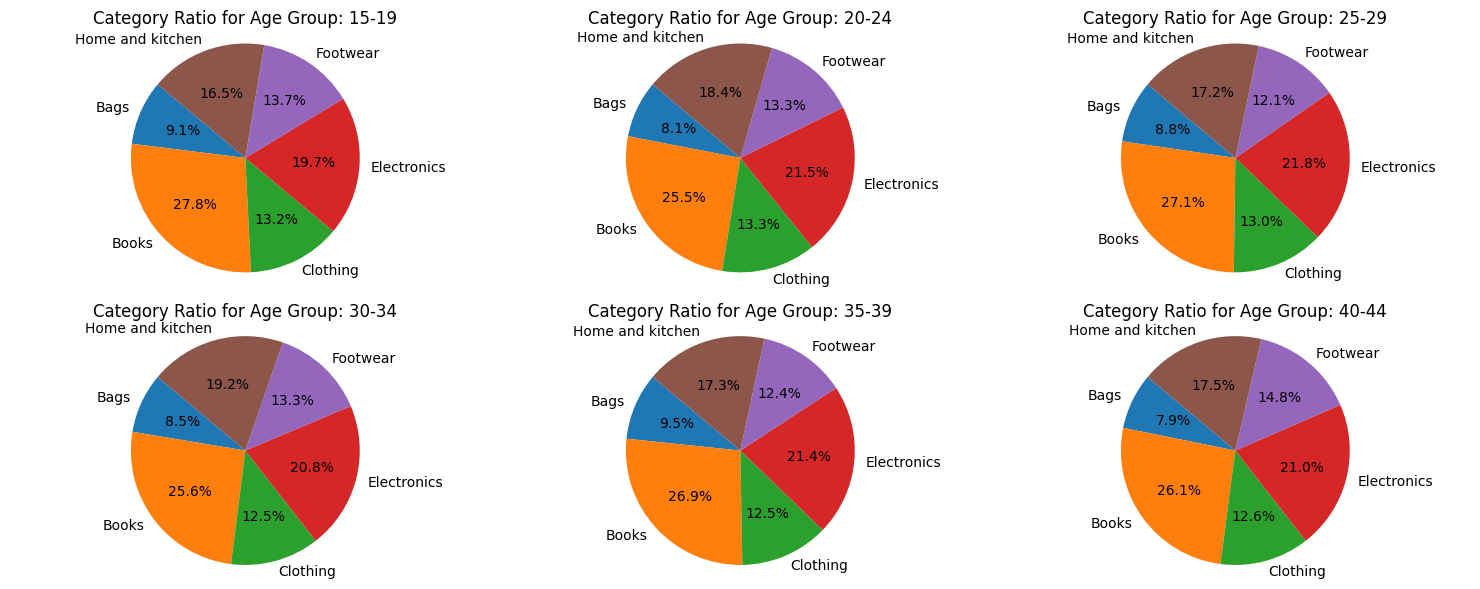

In [ ]:
# 연령대별로 구간을 나누기 위한 함수 정의
def age_group(age):
    if age < 20:
        return "15-19"
    elif age < 25:
        return "20-24"
    elif age < 30:
        return "25-29"
    elif age < 35:
        return "30-34"
    elif age < 40:
        return "35-39"
    else:
        return "40-44"

df['age_group'] = df['age'].apply(age_group)

# 연령대별 구매 카테고리 비율 계산
category_ratio_per_age = df.groupby(['age_group', 'prod_cat']).size().unstack(fill_value=0)
category_ratio_per_age = category_ratio_per_age.div(category_ratio_per_age.sum(axis=1), axis=0)

# 파이차트 그리기
def plot_pie_chart(ax, df, age_group):

    # 연령대별 카테고리 비율 추출
    category_ratio = df.loc[age_group]

    # 파이차트 그리기
    ax.pie(category_ratio.values, labels=category_ratio.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  # 원 모양 유지
    ax.set_title(f'Category Ratio for Age Group: {age_group}')

# 연령대 리스트 추출
age_groups = category_ratio_per_age.index

# 2x3 서브플롯 생성
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# 연령대별로 파이차트 그리기
for i, age_group in enumerate(age_groups):
    plot_pie_chart(axs[i//3, i%3], category_ratio_per_age, age_group)

plt.tight_layout()
plt.show()


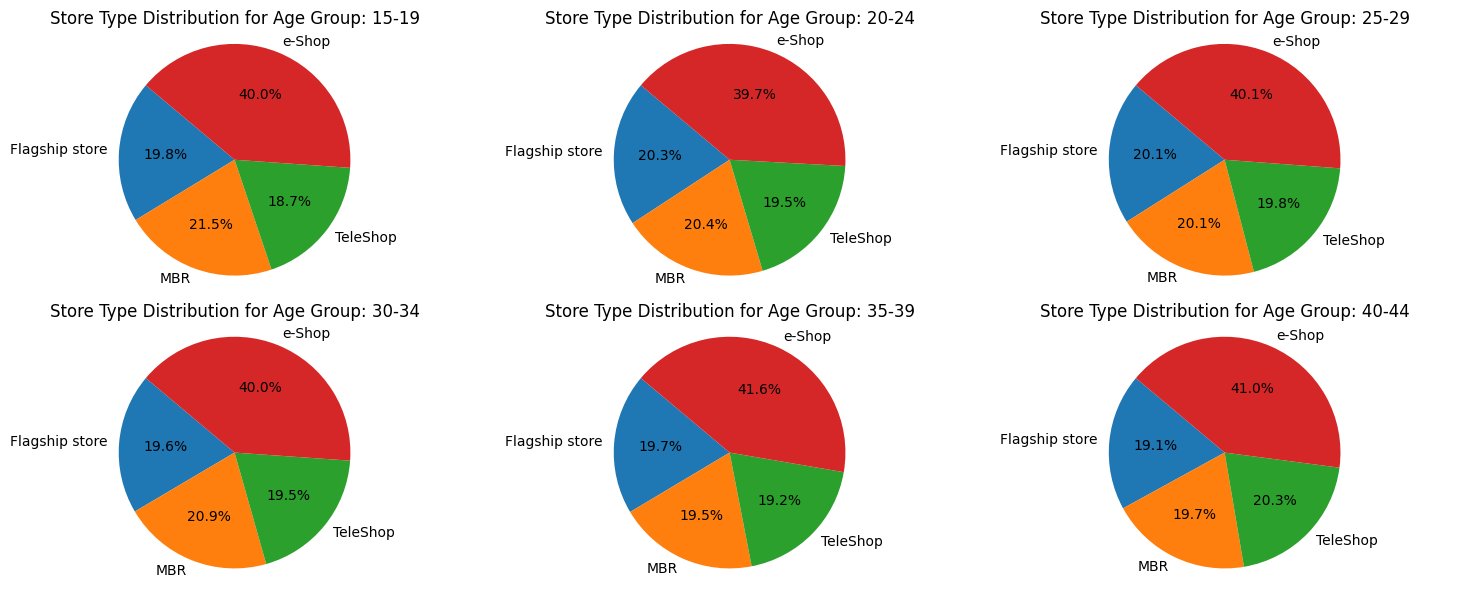

In [ ]:
# 연령대별 Store_type의 비율 계산
store_type_ratio_per_age = df.groupby(['age_group', 'store_type']).size().unstack(fill_value=0)
store_type_ratio_per_age = store_type_ratio_per_age.div(store_type_ratio_per_age.sum(axis=1), axis=0)

# 파이차트 그리기
def plot_pie_chart(ax, df, age_group):
    store_type_ratio = df.loc[age_group]
    ax.pie(store_type_ratio, labels=store_type_ratio.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(f'Store Type Distribution for Age Group: {age_group}')

age_groups = store_type_ratio_per_age.index

fig, axs = plt.subplots(2, 3, figsize=(15, 6))

for i, age_group in enumerate(age_groups):
    plot_pie_chart(axs[i//3, i%3], store_type_ratio_per_age, age_group)

plt.tight_layout()
plt.show()

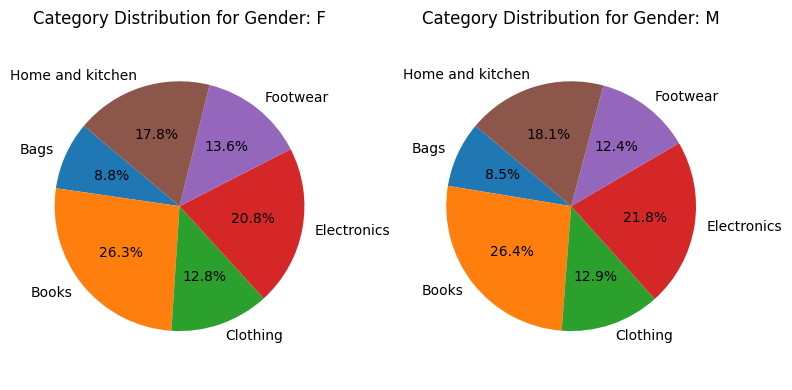

In [ ]:
# 성별이 'Unknown'인 데이터 제외
df2 = df[df['gender'] != 'unknown']

# 성별에 따른 카테고리별 판매 비율 계산
category_ratio_per_gender = df2.groupby(['gender', 'prod_cat']).size().unstack(fill_value=0)
category_ratio_per_gender = category_ratio_per_gender.div(category_ratio_per_gender.sum(axis=1), axis=0)

# 파이차트 그리기
def plot_pie_chart(ax, df2, gender):
    category_ratio = df2.loc[gender]
    ax.pie(category_ratio, labels=category_ratio.index, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')
    ax.set_title(f'Category Distribution for Gender: {gender}')

genders = category_ratio_per_gender.index

fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # 1x2 서브플롯 생성

for i, gender in enumerate(genders):
    plot_pie_chart(axs[i], category_ratio_per_gender, gender)

plt.tight_layout()
plt.show()

* 시장 동향, 제품 다양성, 지역별 맞춤화, 유통 채널 확대 등 **카테고리별 매출 성장 방안**을 마련하고자 연령대 및 성별에 따른 카테고리별 매출액을 살펴보았으나 뚜렷한 특성을 확인할 수가 없었다.
* 앞서 경과일수 기준 재구매 캠페인을 진행하였을 때 64%의 구매성공률을 나타냈으므로, 프로모션 및 이벤트 등의 방법을 통해 **고객 관점에서 구매 활동성을 증대시키는 방안**을 모색하는 것이 중요하다고 판단된다.
* 특히, e-shop을 통한 구매율이 높기 때문에 구매과정이 보다 원활하고 편리하도록 개선하는 것이 중요하다.
* 2012년을 기준으로 clothing카테고리와 2013년을 기준으로 Home and Kitchen, Books 카테고리의 연 평균 매출액이 감소하는 경향을 보이므로 이 시기에 어떤 이슈가 있었는지 파악할 필요가 있다.